In [2]:
cities = open("cities.txt", "r", encoding="utf-8").read().splitlines()
citiesForChars = open("cities.txt", "r", encoding="utf-8").read()

In [3]:
cities[:10]

['dubai',
 'sharjah',
 'ajman',
 'zaranj',
 'taloqan',
 'shahrak',
 'maymana',
 'kushk',
 'kunduz',
 'khulm']

In [4]:
len(cities)

14117

In [5]:
min(len(c) for c in cities)

2

In [6]:
max(len(c) for c in cities)

22

In [7]:
chars = sorted(list(set(citiesForChars)))
vocab_size = len(chars)
chars.remove("\n")
vocab_size
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [8]:
# Bigrams
bigrams = {}
for city in cities:
    chs = ["."] + list(city) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigrams[bigram] = bigrams.get(bigram, 0) + 1


In [9]:
sorted(bigrams.items(), key = lambda kv: -kv[1])
bigrams

{('.', 'd'): 504,
 ('d', 'u'): 162,
 ('u', 'b'): 137,
 ('b', 'a'): 850,
 ('a', 'i'): 432,
 ('i', '.'): 1140,
 ('.', 's'): 1253,
 ('s', 'h'): 616,
 ('h', 'a'): 1042,
 ('a', 'r'): 1710,
 ('r', 'j'): 14,
 ('j', 'a'): 229,
 ('a', 'h'): 214,
 ('h', '.'): 316,
 ('.', 'a'): 883,
 ('a', 'j'): 98,
 ('j', 'm'): 5,
 ('m', 'a'): 1115,
 ('a', 'n'): 2498,
 ('n', '.'): 1648,
 ('.', 'z'): 210,
 ('z', 'a'): 226,
 ('r', 'a'): 1362,
 ('n', 'j'): 128,
 ('j', '.'): 40,
 ('.', 't'): 766,
 ('t', 'a'): 946,
 ('a', 'l'): 1213,
 ('l', 'o'): 489,
 ('o', 'q'): 12,
 ('q', 'a'): 19,
 ('h', 'r'): 61,
 ('a', 'k'): 418,
 ('k', '.'): 501,
 ('.', 'm'): 1231,
 ('a', 'y'): 359,
 ('y', 'm'): 27,
 ('n', 'a'): 943,
 ('a', '.'): 2816,
 ('.', 'k'): 1008,
 ('k', 'u'): 228,
 ('u', 's'): 272,
 ('h', 'k'): 30,
 ('u', 'n'): 430,
 ('n', 'd'): 648,
 ('u', 'z'): 65,
 ('z', '.'): 90,
 ('k', 'h'): 204,
 ('h', 'u'): 310,
 ('u', 'l'): 267,
 ('l', 'm'): 98,
 ('m', '.'): 325,
 ('a', 'b'): 311,
 ('a', 'd'): 485,
 ('d', '.'): 457,
 ('k', 'a')

In [10]:
import torch



In [11]:
N = torch.zeros((27, 27), dtype=torch.int32)


In [12]:
chars = sorted(list(set("".join(cities))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [13]:

for city in cities:
    chs = ["."] + list(city) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [14]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(-0.5, 26.5, 26.5, -0.5)

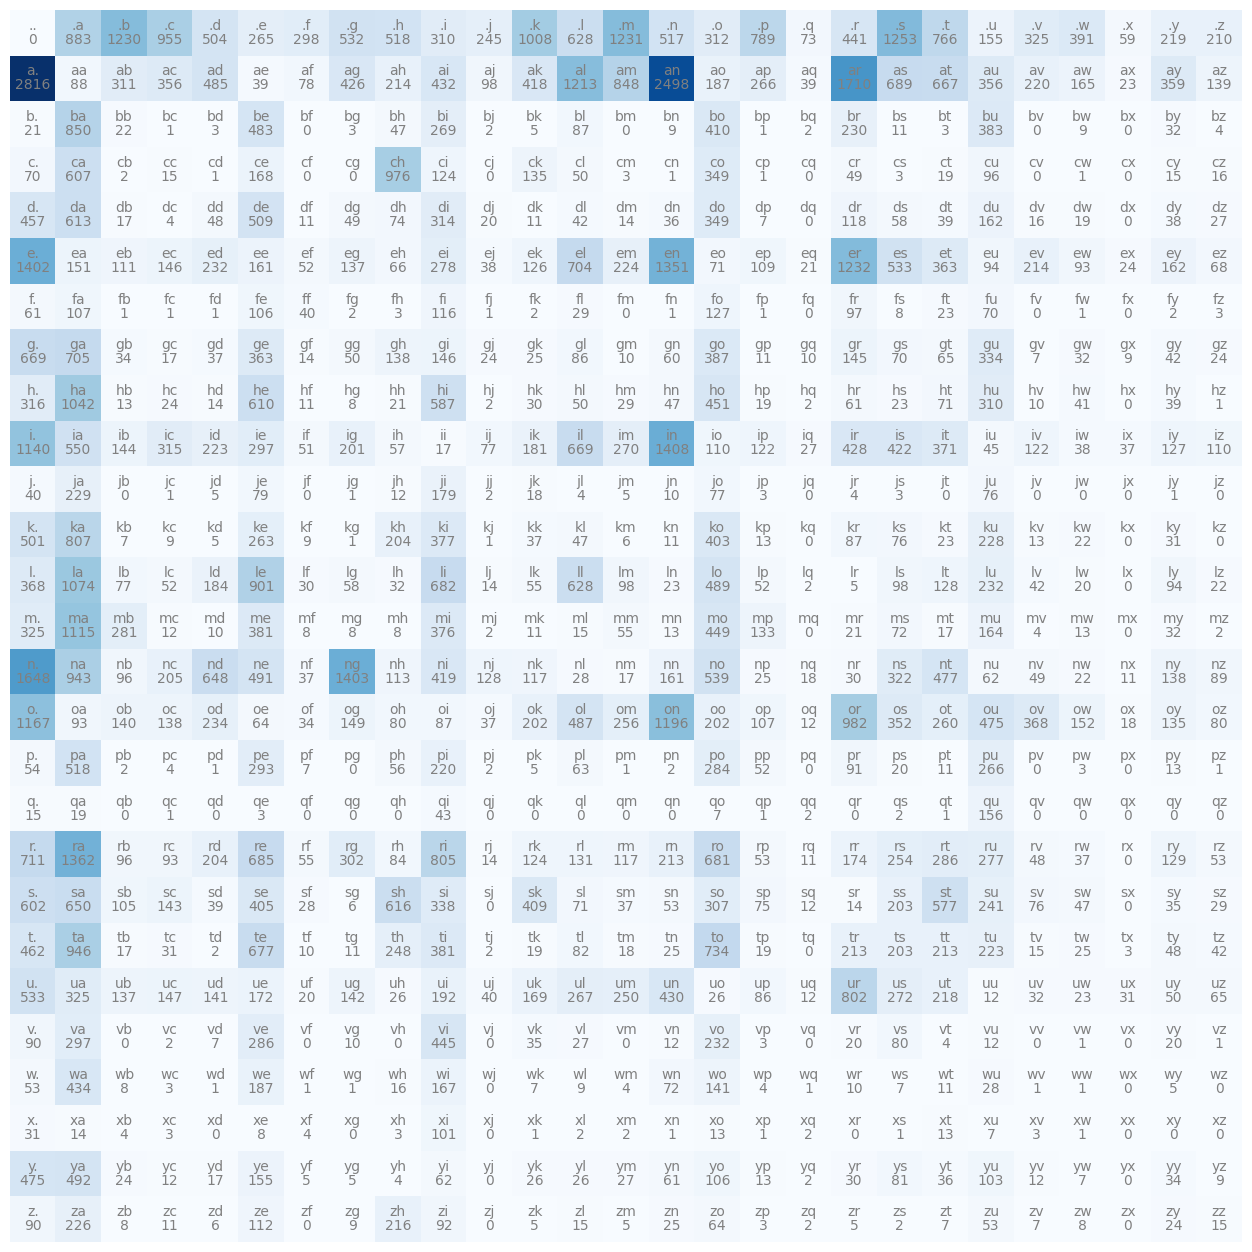

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[16, 16])
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off")


In [16]:
N[0]

tensor([   0,  883, 1230,  955,  504,  265,  298,  532,  518,  310,  245, 1008,
         628, 1231,  517,  312,  789,   73,  441, 1253,  766,  155,  325,  391,
          59,  219,  210], dtype=torch.int32)

In [17]:
p = N[0].float()
p = p / p.sum() ## powerful way to give a row probability distribution instead of raw values
p 

tensor([0.0000, 0.0625, 0.0871, 0.0676, 0.0357, 0.0188, 0.0211, 0.0377, 0.0367,
        0.0220, 0.0174, 0.0714, 0.0445, 0.0872, 0.0366, 0.0221, 0.0559, 0.0052,
        0.0312, 0.0888, 0.0543, 0.0110, 0.0230, 0.0277, 0.0042, 0.0155, 0.0149])

In [18]:
g = torch.Generator().manual_seed(12345)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix
itos[ix]


't'

In [19]:
g = torch.Generator().manual_seed(12345)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.3440, 0.3083, 0.3477])

In [20]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)



tensor([2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2,
        0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0,
        1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0,
        1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0,
        0, 2, 1, 1])

In [21]:
p.shape

torch.Size([3])

In [22]:
P = N[0].float()
p = p / p.sum()
p.shape

torch.Size([3])

In [23]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True) # softmaxing
P.shape

torch.Size([27, 27])

In [24]:
P[0].sum()

tensor(1.)

In [25]:
ix = 0
g = torch.Generator().manual_seed(12345)

for i in range(5):
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


tupurmaponbobynchan.
seosheran.
zari.
selamulbikrmo.
omensankovsa.


In [36]:
log_likelikhood = 0.0
n = 0
for city in cities:
    chs = ["."] + list(city) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelikhood += logprob
        n += 1
        # print(f"{ch1}{ch2}: prob: {prob:.4f}, logprob: {logprob:.4f}")

print(f'{log_likelikhood = }')
nll = -log_likelikhood
print(f'{nll = }')
print(f'{n = }')
print(f'loss (nll/n) = {nll/n}')


log_likelikhood = tensor(-311915.1875)
nll = tensor(311915.1875)
n = 119858
loss (nll/n) = 2.602372646331787


In [ ]:
# neural network
xs, ys = [], []

for city in cities:
    chs = ["."] + list(city) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

g = torch.Generator().manual_seed(12345)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
import torch.nn.functional as F

for k in range(100):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.1*(W**2).mean()
    W.grad = None
    loss.backward()
    W.data += -50 * W.grad
    print(loss.item())

In [29]:
g = torch.Generator().manual_seed(12345)
for i in range(5):
    out = []
    ix = 0
    while True:

        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = (xenc @ W)
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(probs, num_samples= 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0: # period reached
            break

    print(''.join(out))


tururnckoncn.
zokhan.
seprelman.
zasi.
sfiamybandsos.


In [30]:
# bigram model
# tupurmaponbobynchan.
# seosheran.
# zari.S
# selamulbikrmo.
# omensankovsa.

# linear neural net
# tururnckoncn.
# zokhan.
# seprelman.
# zasi.
# sfiamybandsos.

MLP